In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn umap-learn

^C


  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached numba-0.61.2-cp311-cp311-win_amd64.whl.metadata (2.9 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached numba-0.61.2-cp311-cp311-win_amd64.whl (2.8 MB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)

   ---------------------------------------- 0/7 [numba]
   ---------------

In [7]:
!pip install umap-learn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Matplotlib is building the font cache; this may take a moment.


In [12]:
import umap

c:\Users\rojas\Downloads\project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
df = pd.read_csv('project4.csv')  # Or full path like 'C:/Users/you/Documents/your_file.csv'
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop missing values
df.dropna(inplace=True)

# Check cardinality of columns
nunique = df.nunique()

# Drop columns with too many unique values (e.g., >100)
high_card_cols = nunique[nunique > 100].index.tolist()
df.drop(columns=high_card_cols, inplace=True)

# Only get dummies for categorical columns with limited cardinality
cat_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)
df['Cluster']=clusters

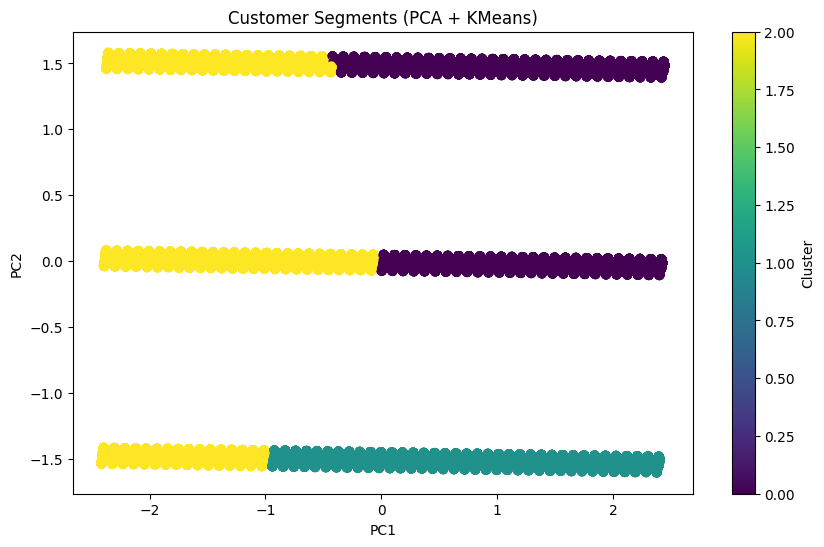

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments (PCA + KMeans)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
import numpy as np

# Sample the data for silhouette score
sample_size = 5000  # you can reduce this if needed
if len(pca_result) > sample_size:
    idx = np.random.choice(len(pca_result), sample_size, replace=False)
    sampled_pca = pca_result[idx]
    sampled_clusters = clusters[idx]
    score = silhouette_score(sampled_pca, sampled_clusters)
else:
    score = silhouette_score(pca_result, clusters)

print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.40


In [20]:
df['Cluster'] = clusters
df.groupby('Cluster').mean()

,Quantity,Customer Age,Returns,Age,Churn,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
Cluster,,,,,,,,,,,
0,3.006905,55.810117,0.501544,55.810117,0.196396,0.251909,0.251516,0.247793,0.539496,0.00000,0.503195
1,3.012922,51.920933,0.497127,51.920933,0.201128,0.251127,0.249995,0.249354,0.000000,1.00000,0.504581
2,3.007213,28.378931,0.502288,28.378931,0.205294,0.248850,0.249240,0.253414,0.337706,0.25616,0.501947


In [21]:
!pip install streamlit

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.9 MB 8.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.9 MB 7.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 7.5 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 7.4 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------------------- 731.2/731.2 kB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   --------- ------------------------------ 1.6/6.9 MB 7.6 MB/s eta 0:00:01
   ------------------ --------------------- 3.1/6.9 MB 7.4 MB/s eta 0:00:01
   ------------------------